## Feature Selection via Chi-Square Test -- Boston

outline:
- what is $\chi^2$, the definition.
    The basic idea of the Chi-square test is to determine the correctness of the theory by observing the deviation between the actual value and the theoretical value. On specific do often first assumes that the two variables is independent, and then observe the actual value (also called observation value) with the theoretical value, the theoretical value is really independent "" if two cases should be value) of the deviation degree, if the deviation is small enough, we think the error is natural samples, If the measurement method is not accurate enough, or if it happens by chance, and the two are indeed independent, then accept the null hypothesis; If the deviation is large enough to make it unlikely that the error was due to chance or imprecise measurement, we assume that the two are in fact related and reject the original hypothesis in favor of the alternative hypothesis.
    The chi-square test is a statistical test of independence to determine the dependency of two variables. It shares similarities with coefficient of determination, R². However, chi-square test is only applicable to categorical or nominal data while R² is only applicable to numeric data.
    From the definition, of chi-square we can easily deduce the application of chi-square technique in feature selection. Suppose you have a target variable (i.e., the class label) and some other features (feature variables) that describes each sample of the data. Now, we calculate chi-square statistics between every feature variable and the target variable and observe the existence of a relationship between the variables and the target. If the target variable is independent of the feature variable, we can discard that feature variable. If they are dependent, the feature variable is very important.



- what does $\chi^2$ mean in categorical model? 

(https://stats.stackexchange.com/questions/24179/how-exactly-does-chi-square-feature-selection-work, https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223)
- based on understanding $\chi^2$ in categorical model, we can explain why we want to use features with high $\chi^2$ score.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
b = datasets.load_boston() 

bos = pd.DataFrame(b.data)
bos.columns = b.feature_names
X = bos[bos.columns]
bos["PRICE"] = b.target
y = bos["PRICE"]

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
corr = bos.corr()
corr.shape

(14, 14)

<AxesSubplot:>

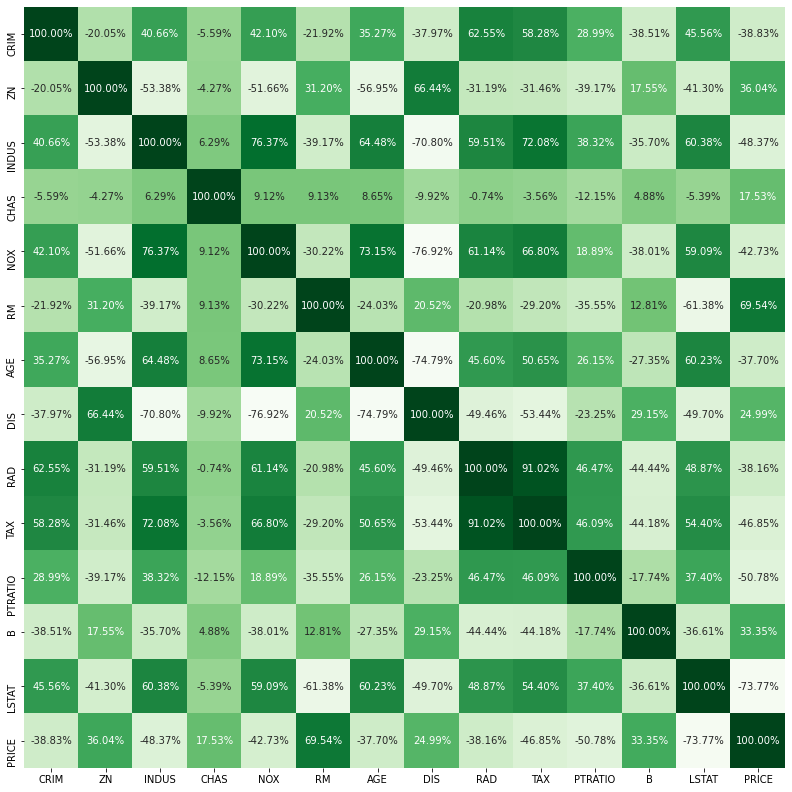

In [4]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

In [5]:
y = np.round(bos['PRICE'])
X = bos[bos.columns]
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

In [6]:
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [7]:
print(featureScores.nlargest(5, 'Score'))

   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


In [8]:
def isPalindrome(self, x:'int')->'bool':
    return str(x) == str(x)[::-1]

In [9]:
def romanToInt(self, s: 'str')->'int':
    a = {'I':1, 'V':5, 'X':10, 'L':'50', 'C':100, 'D':500, 'M':1000}
    ans = 0
    for i in range(len(s)):
        if i<len(s)-1 and a[s[i]]<a[s[i+1]]:
            ans-=a[s[i]]
        else:
            ans+=a[s[i]]
    return ans